In [ ]:
# Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as pex
import tensorflow as tf
import re
import math
import joblib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [ ]:
# Load the dataset
hipparcos = pd.read_csv("/content/hipparcos-voidmain.csv")
star_df = pd.read_csv("/content/hipparcos-voidmain.csv")
star_df2 = pd.read_csv("/content/6class.csv")

In [ ]:
# Show the first 5 rows of both the dataframe
star_df.head()

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
0,H,1,NaN,00 00 00.22,+01 05 20.4,9.10,NaN,H,0.000912,1.089013,...,S,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66,F5,S
1,H,2,NaN,00 00 00.91,-19 29 55.8,9.27,NaN,G,0.003797,-19.498837,...,NaN,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4
2,H,3,NaN,00 00 01.20,+38 51 33.4,6.61,NaN,G,0.005008,38.859286,...,S,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S
3,H,4,NaN,00 00 02.01,-51 53 36.8,8.06,NaN,H,0.008382,-51.893546,...,S,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43,F0V,2
4,H,5,NaN,00 00 02.39,-40 35 28.4,8.55,NaN,H,0.009965,-40.591224,...,NaN,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95,G8III,2


In [ ]:
# Show info the hippocoras df
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118218 entries, 0 to 118217
Data columns (total 78 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Catalog    118218 non-null  object 
 1   HIP        118218 non-null  int64  
 2   Proxy      10925 non-null   object 
 3   RAhms      118218 non-null  object 
 4   DEdms      118218 non-null  object 
 5   Vmag       118217 non-null  float64
 6   VarFlag    11562 non-null   float64
 7   r_Vmag     118217 non-null  object 
 8   RAdeg      117955 non-null  float64
 9   DEdeg      117955 non-null  float64
 10  AstroRef   13734 non-null   object 
 11  Plx        117955 non-null  float64
 12  pmRA       117955 non-null  float64
 13  pmDE       117955 non-null  float64
 14  e_RAdeg    117955 non-null  float64
 15  e_DEdeg    117955 non-null  float64
 16  e_Plx      117955 non-null  float64
 17  e_pmRA     117955 non-null  float64
 18  e_pmDE     117955 non-null  float64
 19  DE:RA      117955 non-n

# Star Rating

Stars are celestial bodies of great importance in the universe, since they emit light and heat that is essential for life on our planet. They are the result of the nuclear fusion of hydrogen in their nuclei, which generates a large amount of energy. The classification of stars is based on their surface temperature and their luminosity. This is reflected in its color and size. One way to classify stars is by the Hertzsprung-Russell stellar sequence, also known as the “Hertzprung-Russell diagram”. In this diagram, stars are classified based on their surface temperature and luminosity, which allows their position in the stellar sequence to be determined.

## 1.1 Absolute magnitude

The absolute magnitude of a star is a measure of its intrinsic brightness, that is, its true brightness regardless of its distance from us. It is used to compare the luminosity of different stars. Absolute magnitude is measured on an inverse logarithmic scale, such that a star of absolute magnitude -1 is 100 times more luminous than a star of absolute magnitude 1. This means that as the absolute magnitude number increases, the star it becomes less bright. For example, a star with an absolute magnitude of -1 is brighter than a star with an absolute magnitude of 1.

The absolute magnitude scale is based on the idea that the difference of one magnitude is equal to 2,512 times the difference in luminosity, that is, a star with an absolute magnitude of -1 is 2,512 times brighter than a star with a magnitude absolute of 0.

The absolute magnitude is calculated from the apparent magnitude (the measure of a star's brightness as observed from Earth) and the distance from the star. This makes it possible to compare the luminosity of stars that are at different distances from Earth.

As the absolute magnitude increases, the star becomes less luminous. The brightest known star, Sirius, has an absolute magnitude of -1.46. It is important to mention that the apparent magnitude is the measure of the light that reaches us from a star, and this can vary depending on the distance to the star.

A star with an absolute magnitude of -2 is not necessarily 2512*2 times more luminous than a star with an absolute magnitude of 0. It is important to remember that absolute magnitude is a logarithmic measure, which means that a difference of 5 absolute magnitudes represents a factor of 100 in lightness.

The apparent magnitude (m) is related to the absolute magnitude (M) through the formula:

$M = m - 5log_{10}(\frac{d}{10})$

The term 5x(log10(dpc)+1) is known as the modulus of distance and is denoted by μ. Therefore, the absolute magnitude of an object could be written as

$M = m - \mu$

## 1.2 Color Index (B-V)
The color index (B-V) is a measure of the difference in magnitude between two bands of the electromagnetic spectrum: blue (B) and green (V). It is mainly used in astronomy to measure the color of stars and determine their effective temperature. A lower B-V value indicates a hotter (white or bluish) star while a higher value indicates a cooler (red) star.

## 1.3 Plotting the model



1.   Calculate the distance to a celestial object.

to calculate the distance to a celestial object using trigonometric parallax measured in milliarcseconds (mass). Parallax is expressed in arcseconds (seconds) and to convert to milliarcseconds, divide by 1000. Arcseconds are a unit of angle measurement used in astronomy. An arc second is 1/3600 of a degree. Arcseconds are used to measure the angular separations between objects in the sky, such as the angular distance between two nearby stars or the angular size of a planet or star.

In relation to the mass of stars, seconds of arc are used to measure the angular size of stars in binary stars, stars that orbit around each other. The angular size of a star in a binary system, together with the star's radial velocity, allows the star's mass to be calculated.

In addition, arc seconds are also used in the measurement of stellar parallax, which allows the distance to nearby stars to be calculated. Stellar parallax is the change in the apparent position of a star due to the oscillation of the observing position, caused by the orbital motion of the Earth around the Sun. Stellar parallax is measured in seconds of arc, and its magnitude is used to calculate the distance to the star.


Stellar parallax is used to calculate the distance of a star from Earth. Stellar parallax is the change in the apparent position of a star due to the oscillation of the observing position, caused by the orbital motion of the Earth around the Sun. Stellar parallax is measured in seconds of arc, and its magnitude is used to calculate the distance to the star.

For example, if the stellar parallax of a star is 1 arcsecond, the star can be calculated to be at a distance of approximately 3.26 light-years from Earth. This technique is very accurate and is used to measure the distance to nearby stars, but its accuracy decreases as the distance increases.

The distance between nearby stars is measured in a different way, you can use techniques such as trigonometric measurements, based on stellar parallax, the method of star clusters, which is based on the relationship between the mass, luminosity and color of the stars. in a star cluster, or the type star method, which is based on the relationship between the absolute magnitude and the apparent magnitude of a star.


$$p = \frac{d}{pc} \times \frac{\pi}{180} \times 3600 $$

where:
parallax is the stellar parallax measured in seconds of arc
d is the distance to the star in units of parsec (pc)
pi is the value of pi (3.14159)

The formula to calculate the apparent magnitude of a star is:

$$m = m_0 + 5 \log_{10}(d) - 5$$

where:
m is the apparent magnitude of the star
m0 is the absolute magnitude of the star
d is the distance to the star in units of parsec (pc)

Absolute magnitude is a measure of the total luminosity of a star, independent of its distance. The apparent magnitude, on the other hand, is a measure of the amount of light reaching Earth from a star, and it depends on both the total luminosity of the star and its distance.

It is important to mention that these formulas are approximations, since to calculate these values ​​accurately, a large number of measurements and adjustments are required, and even then, there may be uncertainties in the calculations.

According to this, the formula to Calculate the distance of a Star is:

$$d = \frac{1}{1000p}$$
2.   Calculate the absolute magnitude (M) of a celestial object from its apparent magnitude (m) and its distance (d). Absolute magnitude is a measure of an object's intrinsic brightness, that is, how bright it would be if it were 10 astronomical units (parsecs) away.

The formula is:

$$M = m - 5 \log_{10} \left(\frac{d}{10}\right)$$

where "m" is the apparent magnitude of the object, "d" is the distance to the object in units of parsecs, and "log10" is the base 10 logarithm function.

Apparent magnitude is a measure of the brightness of a celestial object as observed from Earth and can vary due to distance from the object and atmospheric conditions. Absolute magnitude is a distance-independent measure and is useful for comparing the brightness of different celestial objects.

The formula is based on the fact that the apparent magnitude of an object is inversely proportional to its distance. As the distance increases, the apparent magnitude decreases. Therefore, subtracting the logarithm of the distance in parsecs divided by 10 from the apparent magnitude, gives the absolute magnitude.

temperature of a star:

$$T = 4600K\Bigg(\frac{1}{0.92 (B-V) + 1.7} + \frac{1}{1.5 (B-V) + 0.62}\Bigg)$$

In [ ]:
# Filter Parallax
star_df = star_df[star_df["Plx"]>0.000001]
star_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113710 entries, 0 to 118217
Data columns (total 78 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Catalog    113710 non-null  object 
 1   HIP        113710 non-null  int64  
 2   Proxy      10553 non-null   object 
 3   RAhms      113710 non-null  object 
 4   DEdms      113710 non-null  object 
 5   Vmag       113710 non-null  float64
 6   VarFlag    10508 non-null   float64
 7   r_Vmag     113710 non-null  object 
 8   RAdeg      113710 non-null  float64
 9   DEdeg      113710 non-null  float64
 10  AstroRef   13035 non-null   object 
 11  Plx        113710 non-null  float64
 12  pmRA       113710 non-null  float64
 13  pmDE       113710 non-null  float64
 14  e_RAdeg    113710 non-null  float64
 15  e_DEdeg    113710 non-null  float64
 16  e_Plx      113710 non-null  float64
 17  e_pmRA     113710 non-null  float64
 18  e_pmDE     113710 non-null  float64
 19  DE:RA      113710 non-n

In [ ]:
# Remove null values of B-V
star_df = star_df.dropna(subset = ["B-V"])
star_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112823 entries, 0 to 118217
Data columns (total 78 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Catalog    112823 non-null  object 
 1   HIP        112823 non-null  int64  
 2   Proxy      10291 non-null   object 
 3   RAhms      112823 non-null  object 
 4   DEdms      112823 non-null  object 
 5   Vmag       112823 non-null  float64
 6   VarFlag    10312 non-null   float64
 7   r_Vmag     112823 non-null  object 
 8   RAdeg      112823 non-null  float64
 9   DEdeg      112823 non-null  float64
 10  AstroRef   12660 non-null   object 
 11  Plx        112823 non-null  float64
 12  pmRA       112823 non-null  float64
 13  pmDE       112823 non-null  float64
 14  e_RAdeg    112823 non-null  float64
 15  e_DEdeg    112823 non-null  float64
 16  e_Plx      112823 non-null  float64
 17  e_pmRA     112823 non-null  float64
 18  e_pmDE     112823 non-null  float64
 19  DE:RA      112823 non-n

In [ ]:
# Get values of bmv, m, p
bmv = np.array(star_df["B-V"], dtype=float)
m = np.array(star_df["Vmag"], dtype=float)
p = np.array(star_df["Plx"], dtype=float)

In [ ]:
# Calculate Distance with Parallax in milliarcseconds
# Calculate the temperature
# Calculate the absolute magnitude

d = 1/p*1000
t = np.array(4600 * (1/(0.92 * bmv + 1.7) + 1/(0.92 * bmv + 0.62)))
M = m - 5 * np.log10(d/10)

print(d, t, M, sep="\n")

[282.48587571  45.66210046 355.87188612 ... 200.          52.02913632
 114.81056257]
[ 6471.66782641  4745.14042459 10368.59558776 ...  4745.14042459
  5608.54490151 11168.81296033]
[ 1.84501631  5.97222057 -1.1464684  ...  1.08485002  5.61876692
 -0.80990922]


In [ ]:
# Line that shows the flow of movement in the graph of the stars throughout their lives.
sequence_principal_x = [-0.1,0, .2,0.5, 1, 1.4, 1.713]
sequence_principal_y = [0,-1.42, -2, -4, -6.5, -9, -13.21]

whiteDwarfs_x = [-0.2, -0.03, 0.5,1.5]
whiteDwarfs_y = [-10, -11.18,-13, -14]

SubGiants_x = [-0.1, .5 ,1.613]
SubGiants_y = [1, -2.5 , -4]

SuperGiants_x = [-0.2, 1.613]
SuperGiants_y = [9.5, 10]

giants_x = [-0.1,0.35 ,0.8 ,1.2 ,1.713]
giants_y = [2,0 ,-0.7, 0,1.231]

giantsBrillant_x = [-0.1,0.8 ,1.713]
giantsBrillant_y = [5, 4 ,5]

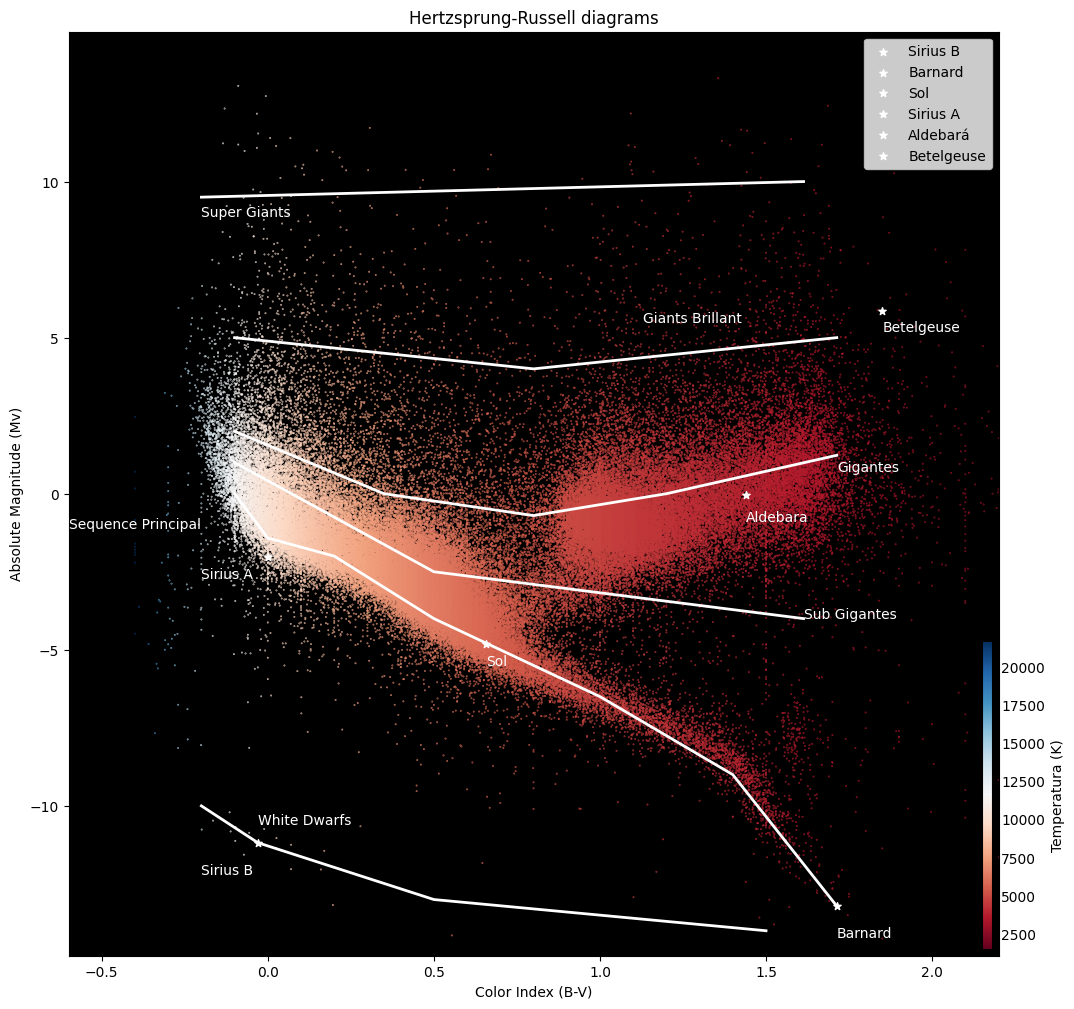

In [ ]:
# Plot the graph
fig, ax = plt.subplots(figsize=(12, 12))
scatter = ax.scatter(bmv, -M, c=t, cmap="RdBu", marker='.', s=.5)

ax.scatter(x=-0.03, y=-11.18, c="white", s=30, label="Sirius B", marker="*")
ax.scatter(x=1.713, y=-13.21, c="white", s=30, label="Barnard", marker="*")
ax.scatter(x=0.656, y=-4.83, c="white", s=30, label="Sol", marker="*")
ax.scatter(x=0, y=-2.02, c="white", s=30, label="Sirius A", marker="*")
ax.scatter(x=1.44, y=-0.031, c="white", s=30, label="Aldebará", marker="*")
ax.scatter(x=1.85, y=5.85, c="white", s=30, label="Betelgeuse", marker="*") 

# Set xlabel, ylabel and title
plt.xlabel("Color Index (B-V)")
plt.ylabel("Absolute Magnitude (Mv)")
plt.title("Hertzsprung-Russell diagrams")
plt.legend() 

# Set x and y limit
plt.xlim(-0.6, 2.2)
plt.ylim(-14.8, 14.8)

# Plot the stars
plt.plot(sequence_principal_x, sequence_principal_y, c="white", linewidth=2)
plt.plot(whiteDwarfs_x, whiteDwarfs_y, c="white", linewidth=2)
plt.plot(SubGiants_x, SubGiants_y, c="white", linewidth=2)
plt.plot(giants_x, giants_y, c="white", linewidth=2)
plt.plot(SuperGiants_x, SuperGiants_y, c="white", linewidth=2)
plt.plot(giantsBrillant_x, giantsBrillant_y, c="white", linewidth=2) 

# Write the name of stars
plt.annotate("Super Giants", (-0.2, 8.9), c="white")
plt.annotate("Giants Brillant", (1.13, 5.5), c="white")
plt.annotate("Sequence Principal", (-0.6, -1.1), color="white")
plt.annotate("White Dwarfs", (-0.03, -10.6), color="white")
plt.annotate("Sub Gigantes", (1.613, -4), color="white")
plt.annotate("Gigantes", (1.713, 0.7), color="white")
plt.annotate("Sol", (0.656, -5.5), color="white")
plt.annotate("Betelgeuse", (1.85, 5.2), color="white")
plt.annotate("Aldebara", (1.44, -0.9), color="white")
plt.annotate("Barnard", (1.713, -14.2), color="white")
plt.annotate("Sirius B", (-0.2,-12.2), color="white")
plt.annotate("Sirius A", (-0.2, -2.72), c="white")

# Set black background
Color_BC = plt.gca()
Color_BC.set_facecolor("black")
Color_BC.patch.set_alpha(1)

# place the register of the color palette according to the hue indicated
cbaxes = inset_axes(ax, width="1%", height="33.3%", loc='lower right')
cbar = fig.colorbar(scatter, cax=cbaxes)
cbar.set_label('Temperatura (K)')

## 2.1 Absolute Magnitude and Star Types

 the brightest stars (lowest absolute magnitude) are the largest and hottest, while the faintest stars (highest absolute magnitude) are the smallest and coolest.

In the Hertzprung-Russell diagram, red dwarfs (Type 0) are located in the lower left part of the diagram, since they are cool stars with low luminosity. As the temperature increases, brown dwarfs (Type 1) are in the middle position, white dwarfs (Type 2) are at the top left of the diagram, since they are hot stars with low luminosity.

The main sequence (Type 3) is in the center of the diagram, as they are stars with a wide range of temperatures and luminosities. As the luminosity increases, the giants (Type 4) are in the lower right of the diagram, while the hyper giants (Type 5) are in the upper right, since they are very hot stars with high luminosity. .

It is important to mention that these types of stars are located at different points on the Hertzprung-Russell diagram due to their age and mass. Red and brown dwarfs are old, low-mass stars, while main sequence, giant, and hypergiant stars are young, high-mass stars. These differences in age and mass affect its temperature and luminosity, which in turn determine its position on the Hertzprung-Russell diagram.

In summary, the inverse relationship between absolute magnitude and star type is reflected in the Hertzprung-Russell diagram, where the brightest stars (with lowest absolute magnitude) are on the right side of the diagram, while stars weaker (with higher absolute magnitude) are on the left side of the diagram. This is due to differences in the age and mass of the stars, which affect their temperature and luminosity.

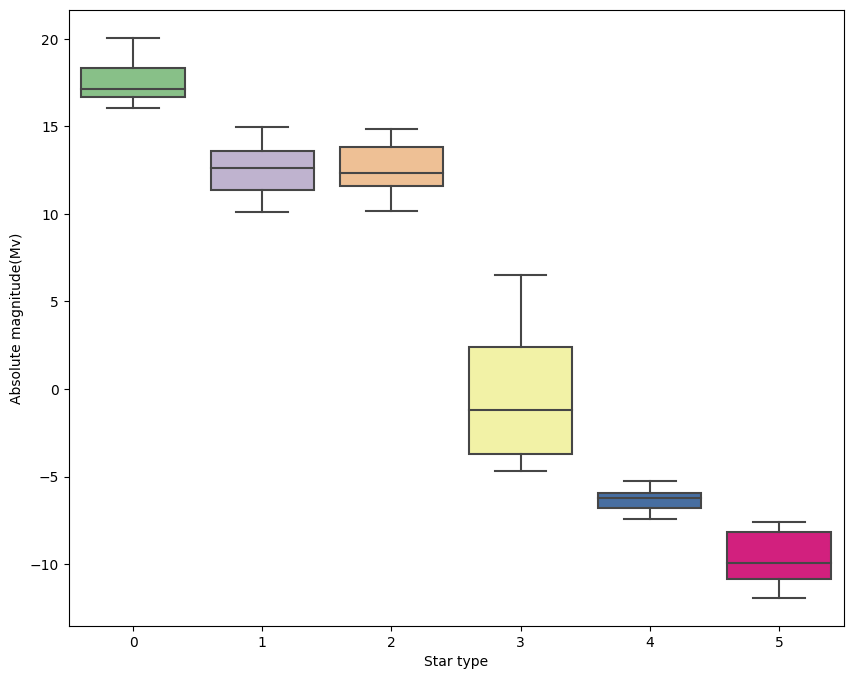

In [ ]:
Mv_type = pd.concat([star_df2["Star type"], star_df2["Absolute magnitude(Mv)"]], axis=1)
fig = plt.figure(figsize=(10, 8))
axes = sns.boxplot(data= Mv_type, x="Star type", y="Absolute magnitude(Mv)", palette="Accent")

## 2.2. Color, Temperature and Spectral Classes

In [ ]:
# Correct the naming for the values.
star_df2["Star color"] = star_df2["Star color"].apply(lambda x: re.sub(r"\s", "-", x))
star_df2["Star color"] = star_df2["Star color"].str.replace("Blue-white", "Blue-White")
star_df2["Star color"] = star_df2["Star color"].str.replace("white", "White")
star_df2["Star color"] = star_df2["Star color"].str.replace("Blue-", "Blue")
star_df2["Star color"] = star_df2["Star color"].str.replace("BlueWhite-", "BlueWhite")

star_df2["Star color"].value_counts(normalize=False, sort=True)

Red                   112
Blue                   56
BlueWhite              41
White                  10
yellow-White            8
Yellowish-White         3
Whitish                 2
Orange                  2
yellowish               2
Pale-yellow-orange      1
White-Yellow            1
Yellowish               1
Orange-Red              1
Name: Star color, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Red'),
  Text(1, 0, 'BlueWhite'),
  Text(2, 0, 'White'),
  Text(3, 0, 'Yellowish-White'),
  Text(4, 0, 'Pale-yellow-orange'),
  Text(5, 0, 'Blue'),
  Text(6, 0, 'Whitish'),
  Text(7, 0, 'yellow-White'),
  Text(8, 0, 'Orange'),
  Text(9, 0, 'White-Yellow'),
  Text(10, 0, 'yellowish'),
  Text(11, 0, 'Yellowish'),
  Text(12, 0, 'Orange-Red')])

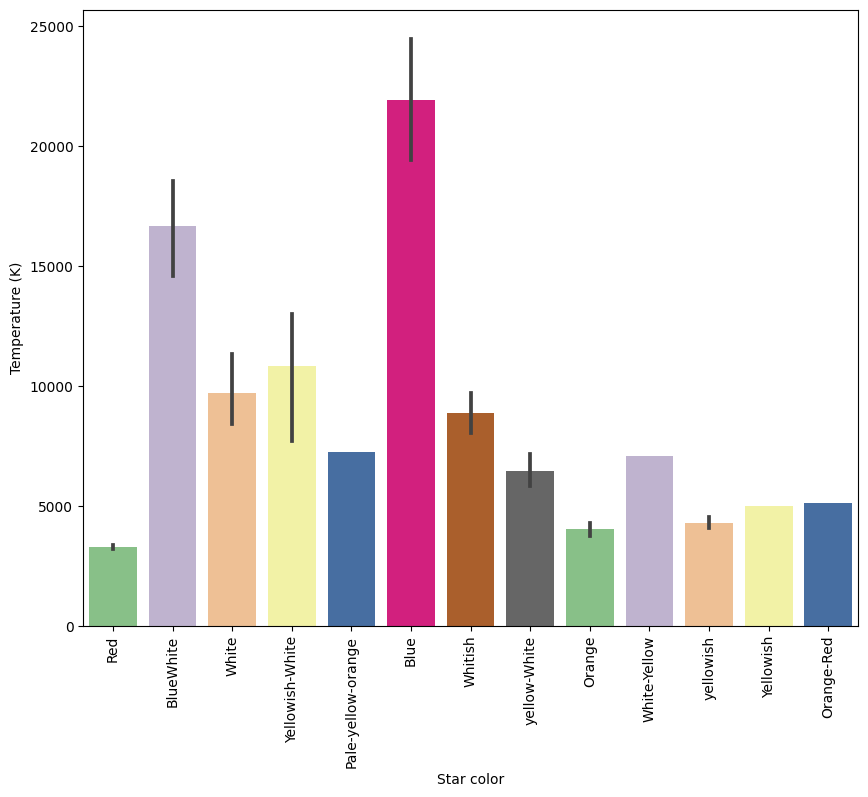

In [ ]:
# Show star color and temperature relation
Mv_color = pd.concat([star_df2["Star color"], star_df2["Temperature (K)"]], axis=1)

fig = plt.figure(figsize=(10, 8))
axes = sns.barplot(data= Mv_color, x= "Star color", y="Temperature (K)", palette= "Accent")
plt.xticks(rotation=90)

The relationship between the color and temperature of stars is known as Wien's Law of radiation. This law states that the wavelength of electromagnetic radiation emitted with greater intensity by a black body increases as its temperature decreases.

In other words, as a star's temperature increases, its radiation moves towards shorter wavelengths, that is, towards ultraviolet, blue and green. As a star's temperature decreases, its radiation moves towards longer wavelengths, that is, towards the infrared, red and orange.

Therefore, a hot star will appear blue or white, while a cool star will appear red. This is because the atoms and molecules in a hot star have a faster rate of motion, which allows them to emit light at a wider range of wavelengths. In contrast, the atoms and molecules in a cool star have a slower rate of motion, meaning they emit light mainly at longer wavelengths.

On the other hand, the spectral classification of stars is based on the analysis of the spectra of stars, and is used to determine the temperature, size, mass, density, rotation speed, and other parameters of stars. The spectral classification is divided into 7 types known as O, B, A, F, G, K, M, each representing a temperature range. For example, O-type stars are the hottest and M-type stars are the coolest.

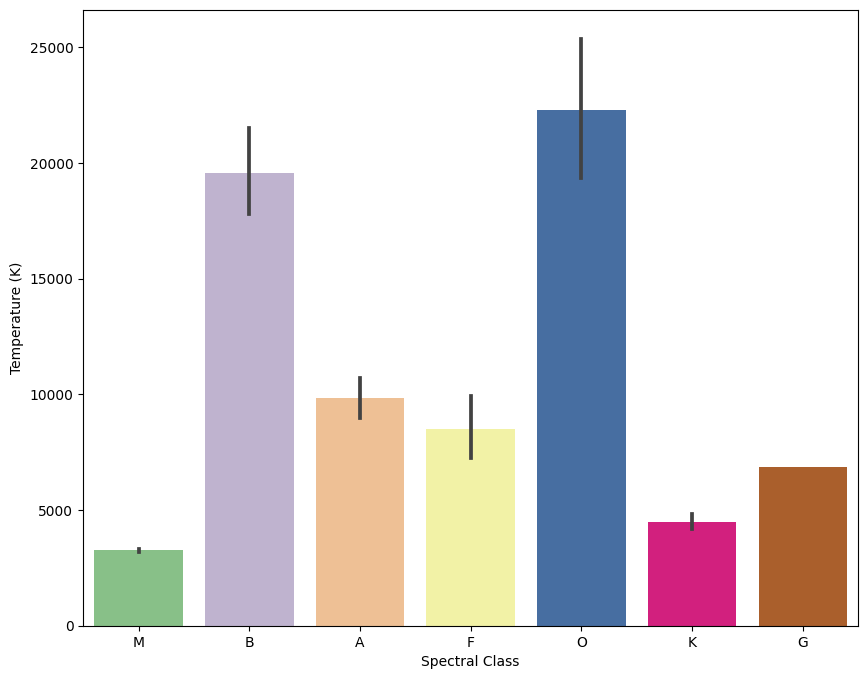

In [ ]:
# Relationship between Spectral class and temperature
Mv_sptype = pd.concat([star_df2["Spectral Class"], star_df2["Temperature (K)"]], axis=1)
fig = plt.figure(figsize=(10, 8))
axes = sns.barplot(data= Mv_sptype, x="Spectral Class", y="Temperature (K)", palette="Accent")

## 2.3 Luminosity, Absolute Magnitude and Temperature


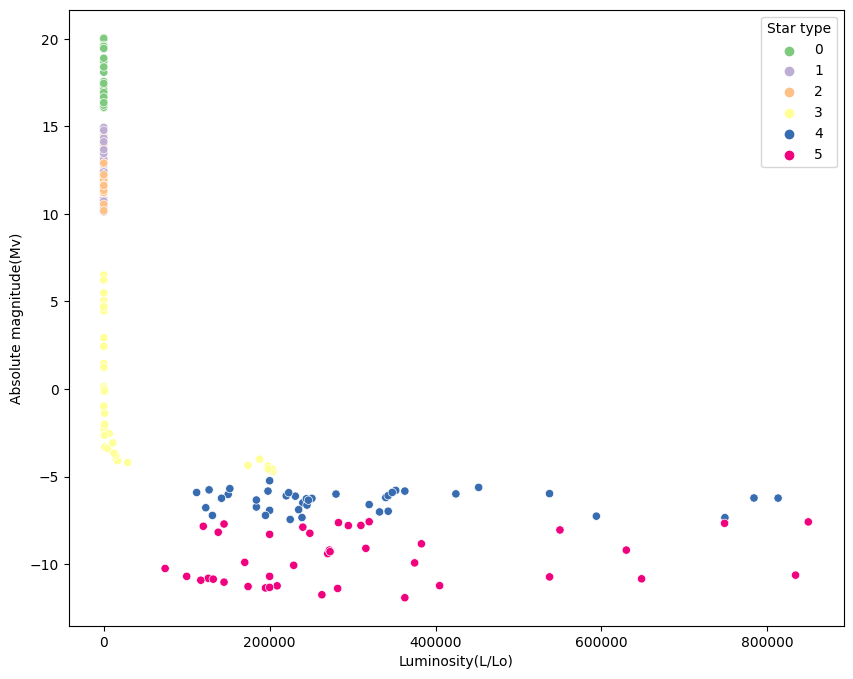

In [ ]:
# Relationship between luminosity and absolute magnitude
fig = plt.figure(figsize=(10, 8))
axes = sns.scatterplot(data=star_df2, x="Luminosity(L/Lo)", y="Absolute magnitude(Mv)", hue="Star type", palette="Accent")

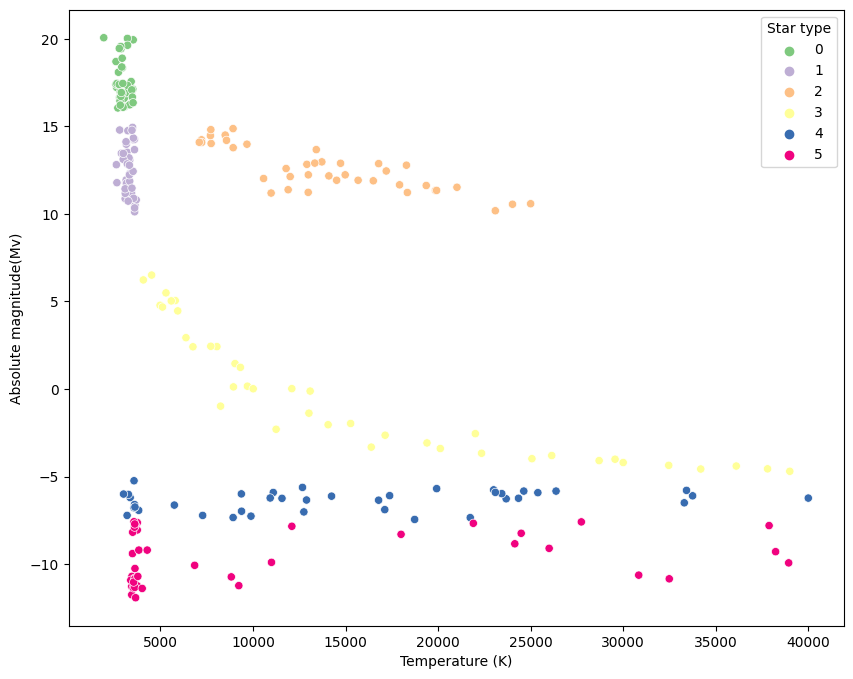

In [ ]:
# Relationship between temperature and absolute magnitude
fig = plt.figure(figsize=(10, 8))
axes = sns.scatterplot(data=star_df2, x= "Temperature (K)", y="Absolute magnitude(Mv)", hue="Star type", palette="Accent")

In [ ]:
# Create function to draw 3d plot
def scatter_plot_3d(serie1, serie2, serie3):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(serie1, serie2, serie3, c = serie3, cmap= "Accent" , s=20, alpha=.5)
  ax.set_xlabel('Luminosity(L/Lo)')
  ax.set_ylabel('Temperature (K)')
  ax.set_zlabel('Absolute magnitude(Mv)')
  plt.show()

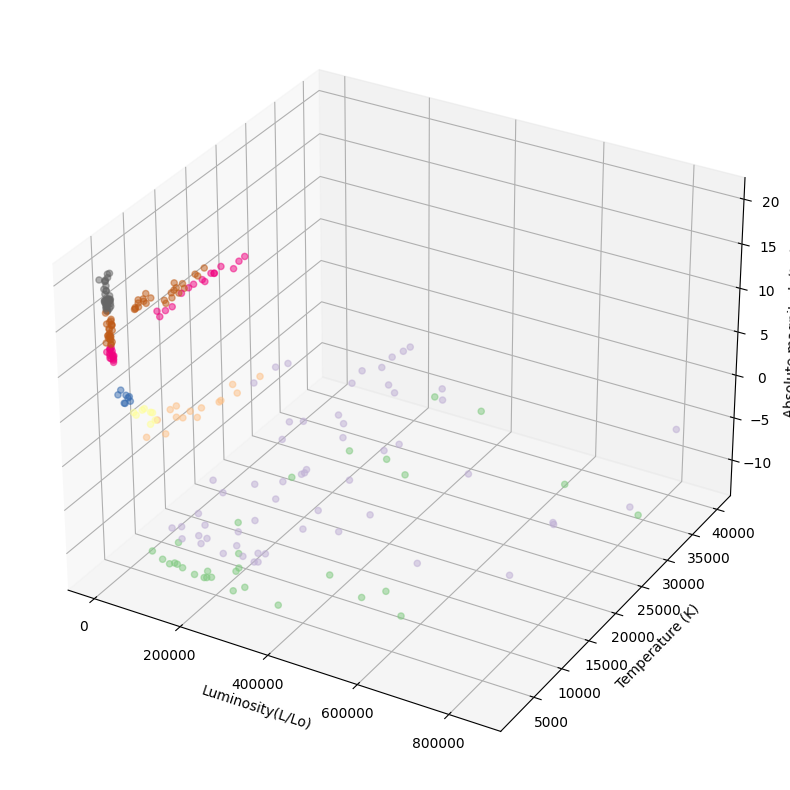

In [ ]:
# Draw the plot
scatter_plot_3d(star_df2["Luminosity(L/Lo)"], star_df2["Temperature (K)"], star_df2["Absolute magnitude(Mv)"])

## 2.4 Radius, Relative Luminosity and Absolute Magnitude

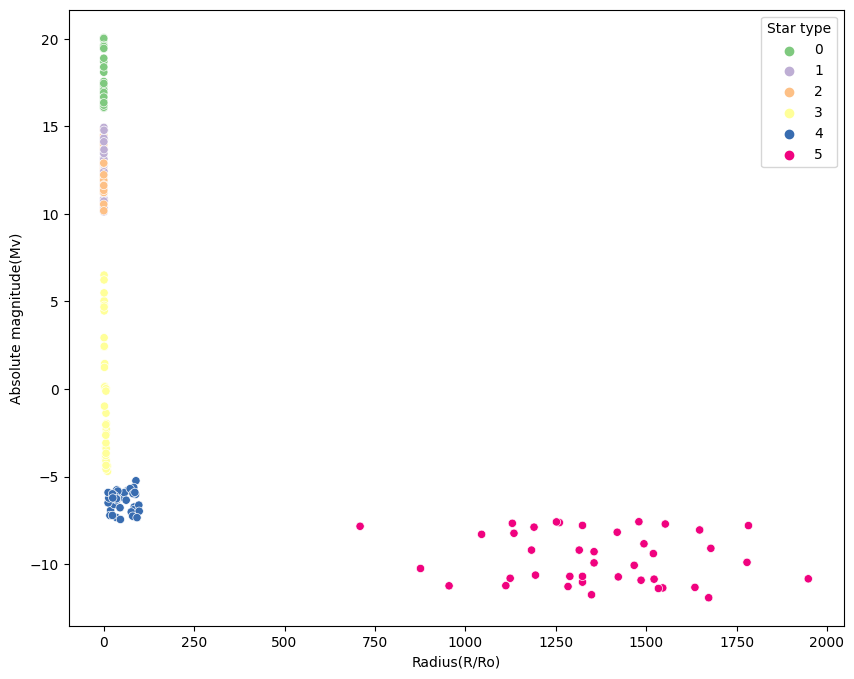

In [ ]:
fig = plt.figure(figsize=(10, 8))
axes = sns.scatterplot(data=star_df2, y="Absolute magnitude(Mv)", x="Radius(R/Ro)", hue="Star type", palette="Accent")

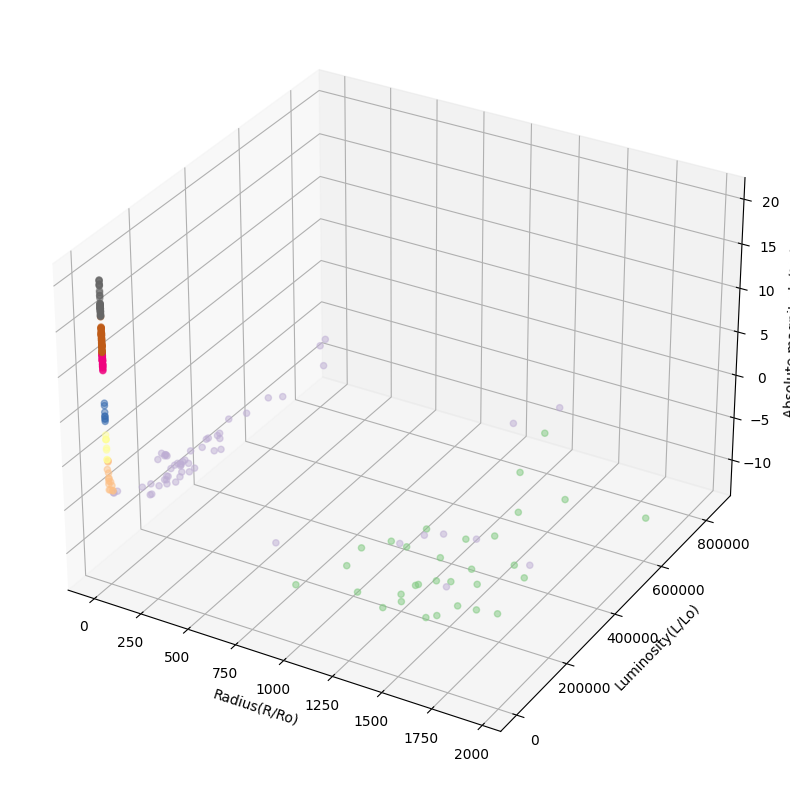

In [ ]:
# Create function to draw 3d plot
def scatter_plot_3d(serie1, serie2, serie3):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(serie1, serie2, serie3, c = serie3, cmap= "Accent" , s=20, alpha=.5)
  ax.set_xlabel('Radius(R/Ro)')
  ax.set_ylabel('Luminosity(L/Lo)')
  ax.set_zlabel('Absolute magnitude(Mv)')
  plt.show()


scatter_plot_3d(star_df2["Radius(R/Ro)"], star_df2["Luminosity(L/Lo)"], star_df2["Absolute magnitude(Mv)"])

# Classification of stars in different evolutionary stages

In [ ]:
# Get Vmag, Plx, B-V
hipparcos = hipparcos.filter(["Vmag", "Plx", "B-V"])

# Calculate Distance
hipparcos["Distance"] = (1 / hipparcos["Plx"]) * 1000

# Calculate Absolute Magnitude
hipparcos["Absolute Magnitude"] =  hipparcos["Vmag"] - 5 * np.log10(hipparcos["Distance"]) + 5

# Calculate effective temperature
hipparcos["Teff"] = np.array(4600 * (1 / (0.92 * hipparcos["B-V"] + 1.7) + 1 / (0.92 * hipparcos["B-V"] + 0.62)))

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Drop null values
hipparcos = hipparcos.dropna()
hipparcos = hipparcos.reset_index()

In [ ]:
# Drop index column
hipparcos.drop(columns="index", inplace=True)

In [ ]:
# Filter the data
hipparcos["SpClass"] = pd.cut(hipparcos["Teff"], bins= [1000, 3500, 5300, 6000, 7500, 10000, 20000, 40000], labels = ["M", "K", "G", "F", "A", "B", "O"])
hipparcos["Star Type"] = pd.cut(hipparcos["Absolute Magnitude"], bins=[-15, -10, -5, 0, 4, 15], labels=[5, 4, 3, 2, 1])

In [ ]:
# Set the conditions
conditions = [((hipparcos["SpClass"]=="M") & (hipparcos["Star Type"]==1)), 
              ((hipparcos["SpClass"]=="K") & (hipparcos["Star Type"]==1)), 
              ((hipparcos["SpClass"]=="G") & (hipparcos["Star Type"]==1)), 
              ((hipparcos["SpClass"]=="F") & (hipparcos["Star Type"]==1)),
              ((hipparcos["SpClass"]=="A") & (hipparcos["Star Type"]==1)),
              ((hipparcos["SpClass"]=="B") & (hipparcos["Star Type"]==1)),
              ((hipparcos["SpClass"]=="O") & (hipparcos["Star Type"]==1)),
              ((hipparcos["SpClass"]=="M") & (hipparcos["Star Type"]==2)), 
              ((hipparcos["SpClass"]=="K") & (hipparcos["Star Type"]==2)), 
              ((hipparcos["SpClass"]=="G") & (hipparcos["Star Type"]==2)), 
              ((hipparcos["SpClass"]=="F") & (hipparcos["Star Type"]==2)),
              ((hipparcos["SpClass"]=="A") & (hipparcos["Star Type"]==2)),
              ((hipparcos["SpClass"]=="B") & (hipparcos["Star Type"]==2)),
              ((hipparcos["SpClass"]=="O") & (hipparcos["Star Type"]==2)),
              ((hipparcos["SpClass"]=="M") & (hipparcos["Star Type"]==3)), 
              ((hipparcos["SpClass"]=="K") & (hipparcos["Star Type"]==3)), 
              ((hipparcos["SpClass"]=="G") & (hipparcos["Star Type"]==3)), 
              ((hipparcos["SpClass"]=="F") & (hipparcos["Star Type"]==3)),
              ((hipparcos["SpClass"]=="A") & (hipparcos["Star Type"]==3)),
              ((hipparcos["SpClass"]=="B") & (hipparcos["Star Type"]==3)),
              ((hipparcos["SpClass"]=="O") & (hipparcos["Star Type"]==3))]

# Set the choice
choices = [
  'Main Sequence',
  'Main Sequence',
  'Main Sequence',
  'Main Sequence',
  'white dwarfs',
  'white dwarfs',
  'white dwarfs',
  'Red Giants',
  'Red Giants',
  'Main Sequence',
  'Main Sequence',
  'Main Sequence',
  'Main Sequence',
  'Main Sequence',
  'Red Giants',
  'Red Giants',
  'Main Sequence',
  'Main Sequence',
  'Main Sequence',
  'Main Sequence',
  'Main Sequence'
    
]

# Get the values
hipparcos['Epochs'] = np.select(conditions, choices, default='HiperGigantes')

# Now print the dataframe
hipparcos

,Vmag,Plx,B-V,Distance,Absolute Magnitude,Teff,SpClass,Star Type,Epochs
0,9.10,3.54,0.482,282.485876,1.845016,6471.667826,F,2,Main Sequence
1,9.27,21.90,0.999,45.662100,5.972221,4745.140425,K,1,Main Sequence
2,6.61,2.81,-0.019,355.871886,-1.146468,10368.595588,B,3,Main Sequence
3,8.06,7.75,0.370,129.032258,2.506509,7044.130880,F,2,Main Sequence
4,8.55,2.87,0.902,348.432056,0.839409,4991.060700,K,2,Red Giants
...,...,...,...,...,...,...,...,...,...
112862,6.99,1.92,1.595,520.833333,-1.593494,3655.993639,K,3,Red Giants
112863,8.23,10.63,0.639,94.073377,3.362666,5818.920292,G,2,Main Sequence
112864,7.59,5.00,0.999,200.000000,1.084850,4745.140425,K,2,Red Giants
112865,9.20,19.22,0.698,52.029136,5.618767,5608.544902,G,1,Main Sequence


In [ ]:
# Drop null values
hipparcos.dropna(inplace=True)

In [ ]:
# Create a LabelEncoder object
le = LabelEncoder()

# Convert categorical labels to unique numeric values
hipparcos.Epochs = le.fit_transform(hipparcos.Epochs)
hipparcos.SpClass = le.fit_transform(hipparcos.SpClass)

In [ ]:
# Get target
target = hipparcos.iloc[:, 8]
hipparcos_t = hipparcos.iloc[:, :-2]

In [ ]:
# Transform features
ss = StandardScaler()
features = ss.fit_transform(hipparcos_t)

In [ ]:
features

array([[ 0.61859251, -0.35944444, -0.45416291, ...,  0.07441257,
         0.13083794, -0.38263887],
       [ 0.75188691,  1.30820981,  0.61563754, ...,  1.80194359,
        -0.71322863,  0.98231512],
       [-1.33377835, -0.42575095, -1.49085543, ..., -1.17773835,
         2.03597217, -1.06511586],
       ...,
       [-0.56537536, -0.22683141,  0.61563754, ..., -0.24377155,
        -0.71322863,  0.98231512],
       [ 0.69700098,  1.06478315, -0.00720566, ...,  1.65399788,
        -0.29112652,  0.29983813],
       [-2.99603788,  0.11015101, -1.60673324, ..., -1.0368642 ,
         2.4271833 , -1.06511586]])

In [ ]:
# Add column name
features = pd.DataFrame(hipparcos_t, columns=hipparcos.columns[:7])

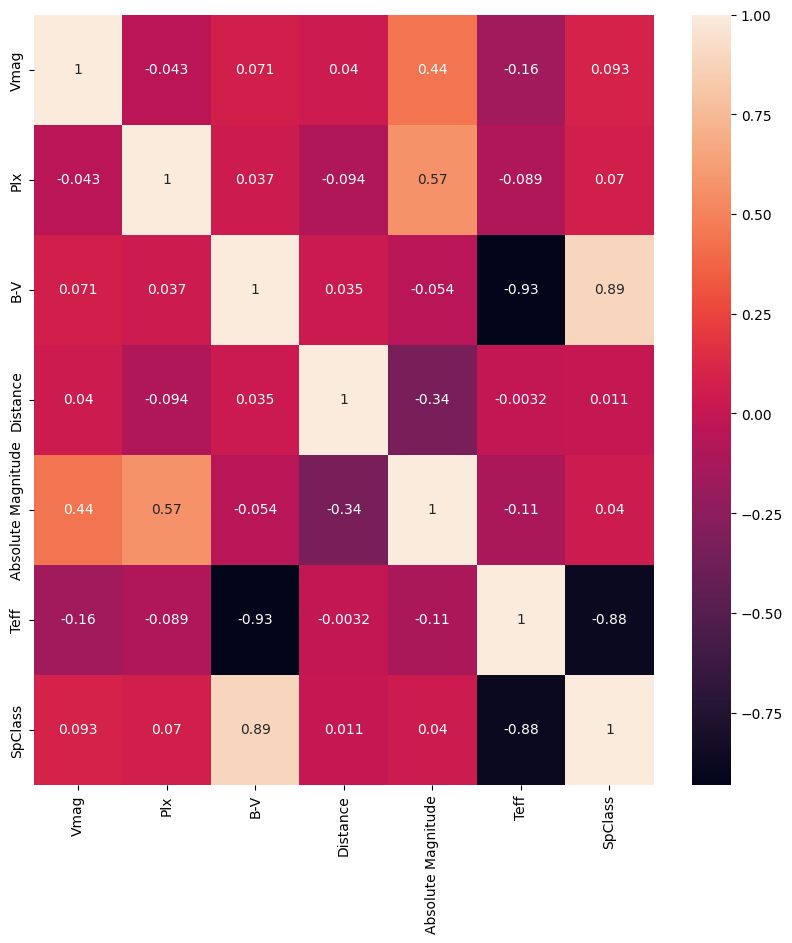

In [ ]:
# Show coorelation
fig = plt.figure(figsize=(10, 10))
matrizC = sns.heatmap(features.corr(), annot=True)

In [ ]:
# Create train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

In [ ]:
# Create RFC model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Use the confusion matrix
y_train_pred = cross_val_predict(rfc, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[  654,     0,     2,     0],
       [    0, 53889,     0,     0],
       [    3,     0, 29949,     0],
       [    0,     7,     0,   112]])

In [ ]:
# Calculate precision and recall with the new classifier
p = precision_score(y_train, y_train_pred, average="macro")
r = recall_score(y_train, y_train_pred, average="macro")
p, r

(0.9988092836130491, 0.984506882461005)

$$Precision = \frac{TruePositives}{(TruePositives + FalsePositives)}$$
<br><br>
$$Recall = \frac{TruePositives}{(TruePositives + FalseNegatives)}$$

In [ ]:
# predict on test values
y_test_pred = rfc.predict(X_test)
y_test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Calculate precision and recall
p = precision_score(y_test, y_test_pred, average="macro")
r = recall_score(y_test, y_test_pred, average="macro")
p, r

(0.9999721990547679, 0.9913693901035674)